<a href="https://colab.research.google.com/github/luis-gustav0/Repository_A/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# funcs

In [2]:
def plot_grafico(data_set, x, y, label, label_y, label_x, figure_size_x=10, figure_size_y=5):
  sns.set_theme(style='darkgrid')
  sns.set_palette('Accent')
  ax = sns.lineplot(data=data_set, x=x, y=y)
  ax.figure.set_size_inches(figure_size_x, figure_size_y)
  ax.set_xlabel(label_x,fontsize = 14)
  ax.set_ylabel(label_y, fontsize = 14)
  ax.set_title(label, fontsize=18)
  ax = ax

In [3]:
def plot_grafico_comparacao(data_set, x, y1, y2, y3, titulo, figure_size_x=10, figure_size_y=5):
  plt.figure(figsize=(figure_size_x,figure_size_y))

  ax=plt.subplot(3,1,1)
  ax.set_title(titulo, loc='left', fontsize=18)
  sns.lineplot(data=data_set, x=x, y=y1)

  plt.subplot(3,1,2)
  sns.lineplot(data=data_set, x=x, y=y2)

  plt.subplot(3,1,3)
  sns.lineplot(data=data_set, x=x, y=y3)

  ax=ax

# Alucar - Vendas

In [4]:
dados_alucar = pd.read_csv('/content/alucar.csv')
dados_alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
dados_alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [6]:
dados_alucar['mes'] = pd.to_datetime(dados_alucar['mes'])

In [7]:
sns.__version__

'0.13.2'

<Axes: xlabel='mes', ylabel='vendas'>

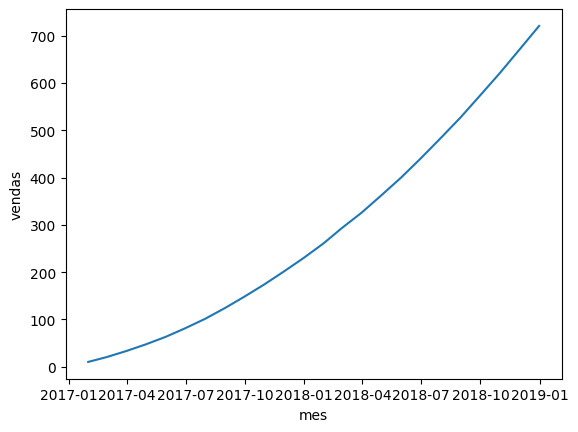

In [8]:
sns.lineplot(data=dados_alucar, x='mes', y='vendas')

## grafico vendas

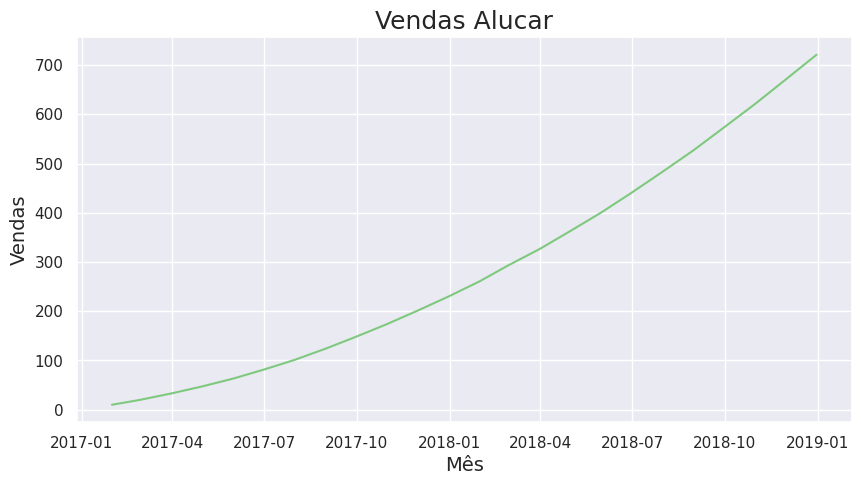

In [9]:
sns.set_theme(style='darkgrid')
sns.set_palette('Accent')
ax = sns.lineplot(data=dados_alucar, x='mes', y='vendas')
ax.figure.set_size_inches(10, 5)
ax.set_xlabel('Mês',fontsize = 14)
ax.set_ylabel('Vendas', fontsize = 14)
ax.set_title('Vendas Alucar', fontsize=18)
ax = ax

## grafico aumento vendas

In [10]:
dados_alucar['aumento'] = dados_alucar['vendas'].diff()

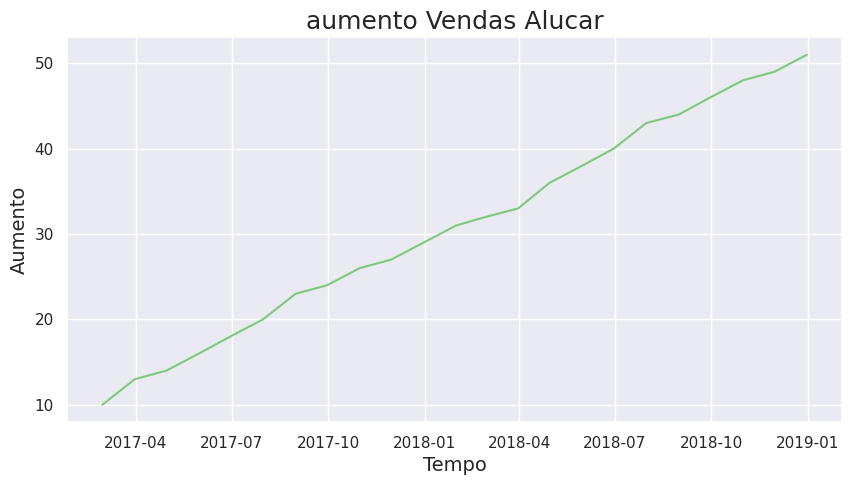

In [11]:
plot_grafico(data_set=dados_alucar, x='mes', y='aumento', label='aumento Vendas Alucar', label_y='Aumento', label_x='Tempo')

## grafico aceleracao

In [12]:
dados_alucar['aceleracao'] = dados_alucar['aumento'].diff()

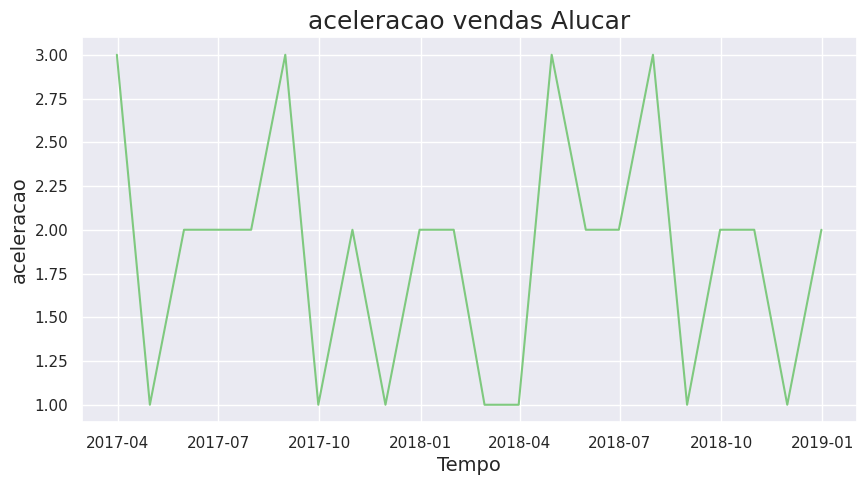

In [13]:
plot_grafico(data_set=dados_alucar, x='mes', y='aceleracao', label='aceleracao vendas Alucar', label_y='aceleracao', label_x='Tempo')

## grafico comparacao

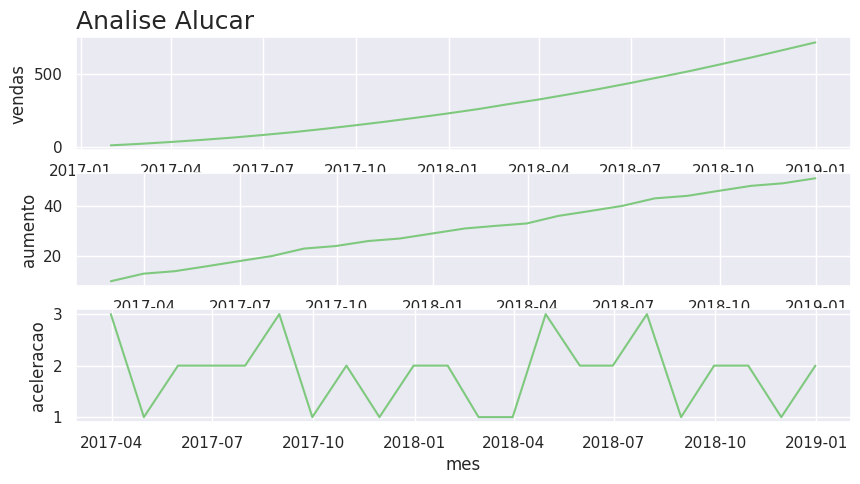

In [14]:
plot_grafico_comparacao(data_set=dados_alucar, x='mes', y1='vendas', y2='aumento', y3='aceleracao', titulo='Analise Alucar')

# auto correlation

correlacao vendas

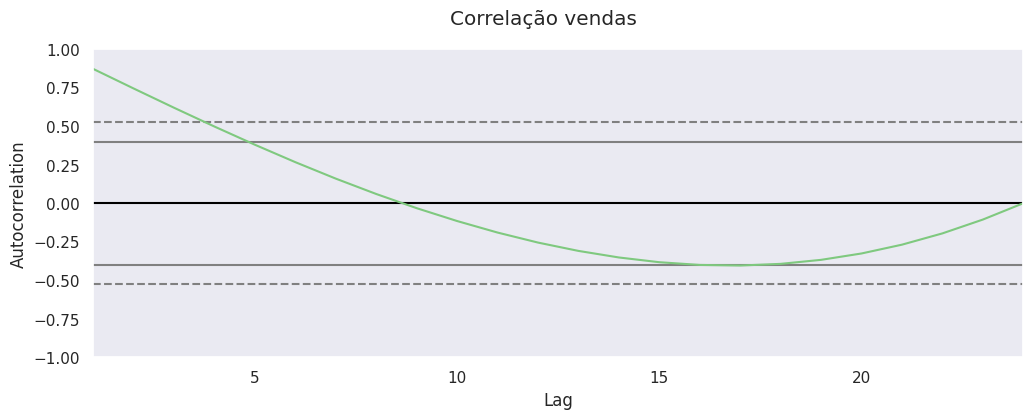

In [15]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação vendas')
autocorrelation_plot(dados_alucar['vendas'])
ax=ax

correlacao aumento

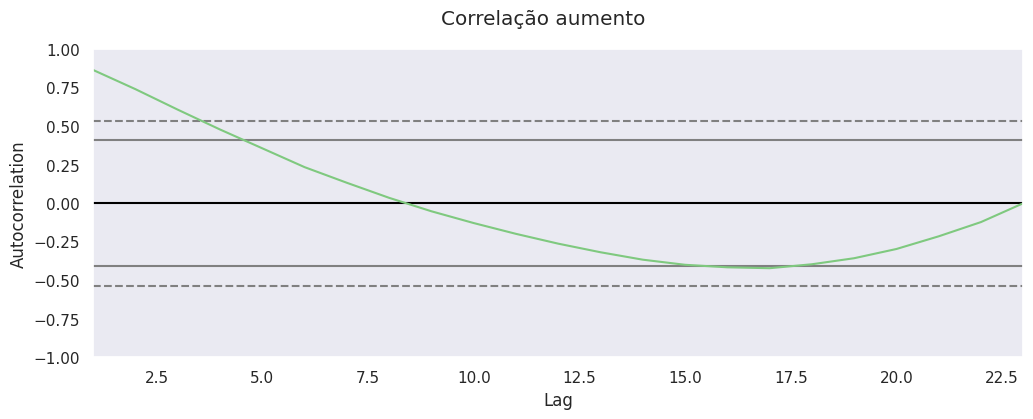

In [16]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação aumento')
autocorrelation_plot(dados_alucar['aumento'][1:])
ax=ax

corr aceleracao

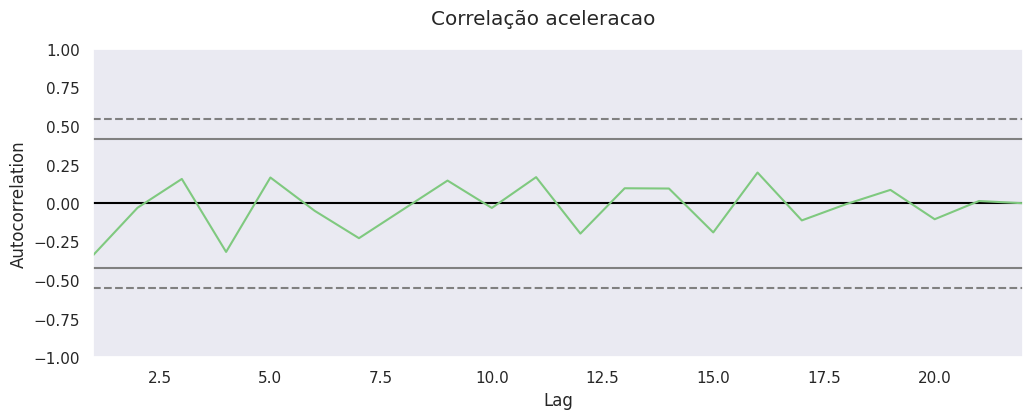

In [17]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação aceleracao')
autocorrelation_plot(dados_alucar['aceleracao'][2:])
ax=ax

# Alucar - assinantes

In [18]:
dados_alucar_assinantes = pd.read_csv('/content/newsletter_alucar.csv')
dados_alucar_assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [19]:
dados_alucar_assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [20]:
dados_alucar_assinantes['mes'] = pd.to_datetime(dados_alucar_assinantes['mes'])

In [21]:
dados_alucar_assinantes['aumento'] = dados_alucar_assinantes['assinantes'].diff()
dados_alucar_assinantes['aceleracao'] = dados_alucar_assinantes['aumento'].diff()

In [22]:
dados_alucar_assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


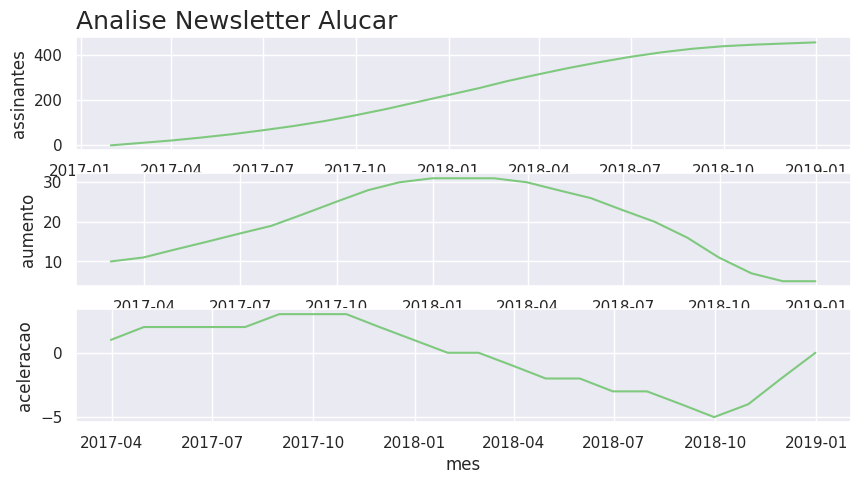

In [23]:
plot_grafico_comparacao(data_set=dados_alucar_assinantes, x='mes', y1='assinantes', y2='aumento', y3='aceleracao', titulo='Analise Newsletter Alucar')

# CHOCOLURA

In [24]:
dados_chocolura = pd.read_csv('/content/chocolura.csv')

In [25]:
dados_chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [26]:
dados_chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [27]:
dados_chocolura['mes'] = pd.to_datetime(dados_chocolura['mes'])

In [28]:
dados_chocolura['aumento'] = dados_chocolura['vendas'].diff()
dados_chocolura['aceleracao'] = dados_chocolura['aumento'].diff()

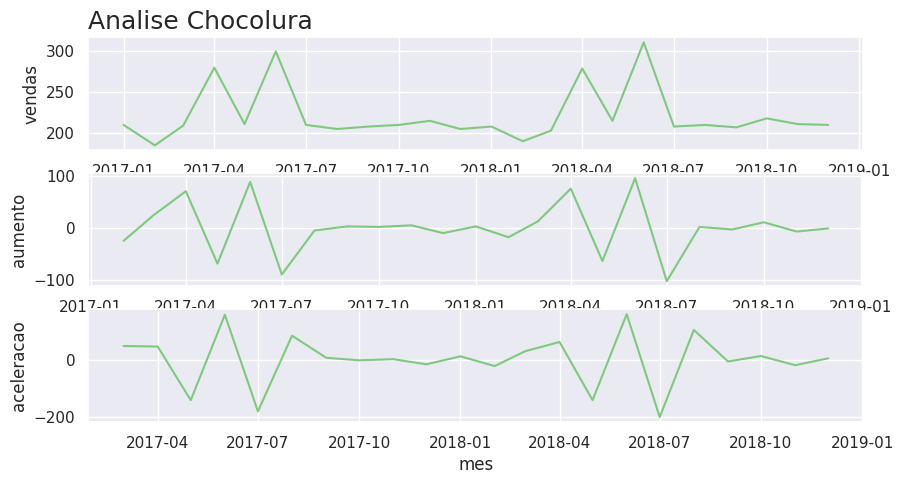

In [29]:
plot_grafico_comparacao(data_set=dados_chocolura, x='mes', y1='vendas', y2='aumento', y3='aceleracao', titulo='Analise Chocolura')

# Chocolura - vanedas diaria (out - nov)

In [30]:
chocolura_vendas_dia = pd.read_csv('/content/vendas_por_dia.csv')

In [31]:
chocolura_vendas_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [32]:
chocolura_vendas_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [33]:
chocolura_vendas_dia['dia'] = pd.to_datetime(chocolura_vendas_dia['dia'])

In [34]:
chocolura_vendas_dia['aumento'] = chocolura_vendas_dia['vendas'].diff()
chocolura_vendas_dia['aceleracao'] = chocolura_vendas_dia['aumento'].diff()

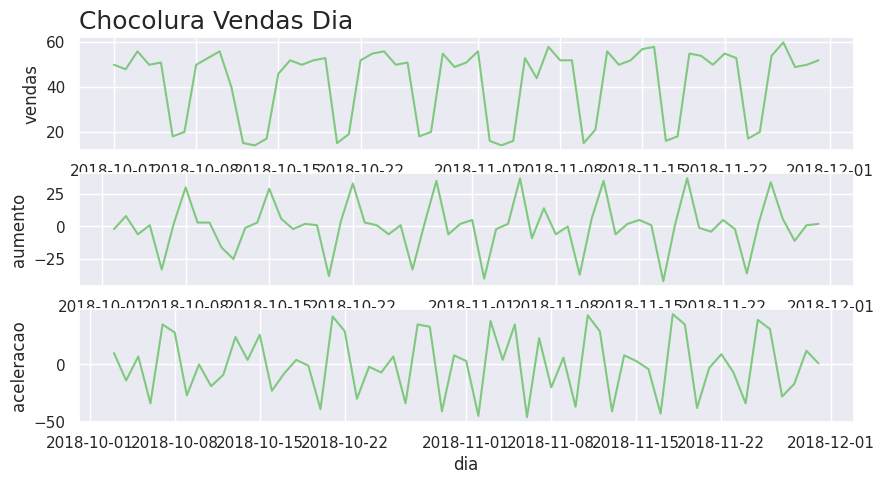

In [35]:
plot_grafico_comparacao(data_set=chocolura_vendas_dia, x='dia', y1='vendas', y2='aumento', y3='aceleracao', titulo='Chocolura Vendas Dia')

Analizando a sazionalidade

In [36]:
chocolura_vendas_dia['dia_semana'] = chocolura_vendas_dia['dia'].dt.day_name()

In [37]:
chocolura_vendas_dia.head()

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


agrupando os dias

In [38]:
vendas_agrupadas = chocolura_vendas_dia.groupby('dia_semana')[['vendas','aumento','aceleracao']].mean().round()

In [39]:
vendas_agrupadas.sort_values(by='vendas', ascending=False)

,vendas,aumento,aceleracao
dia_semana,,,
Wednesday,53.0,1.0,2.0
Monday,52.0,34.0,31.0
Tuesday,52.0,-1.0,-34.0
Thursday,51.0,-2.0,-3.0
Friday,45.0,-7.0,-5.0
Sunday,19.0,3.0,31.0
Saturday,16.0,-28.0,-20.0


Correlação das vendas diárias

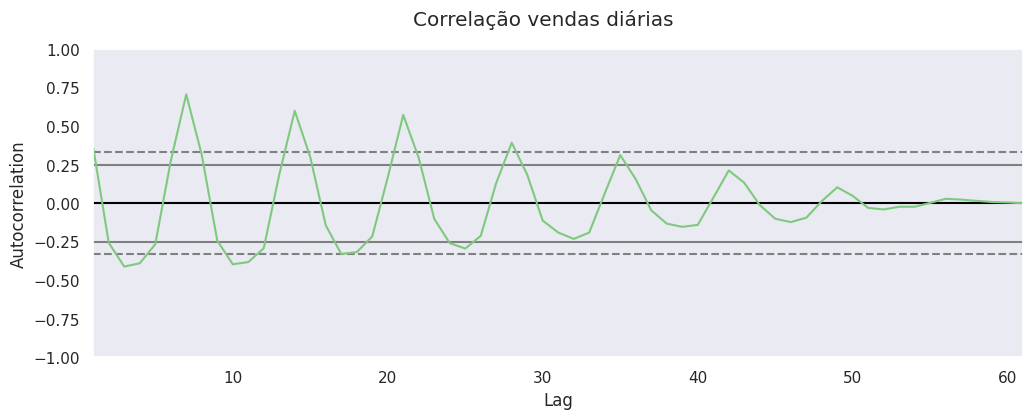

In [40]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação vendas diárias')
autocorrelation_plot(chocolura_vendas_dia['vendas']);

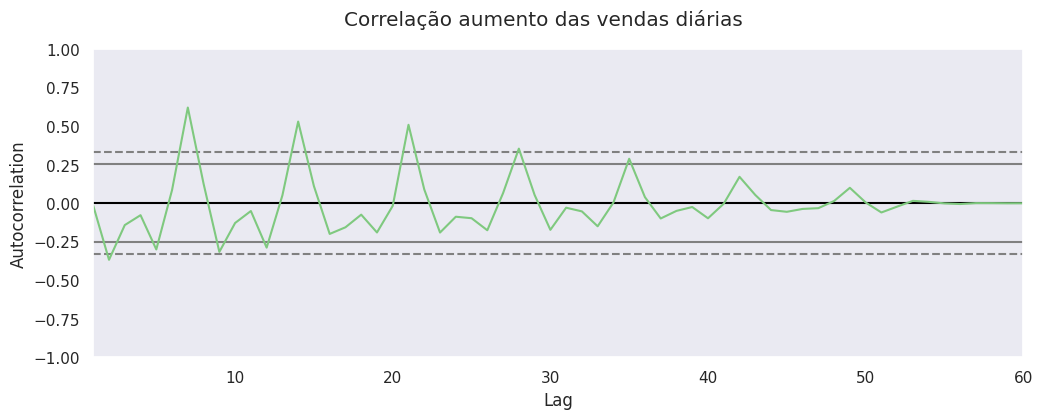

In [41]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação aumento das vendas diárias')
autocorrelation_plot(chocolura_vendas_dia['aumento'][1:]);

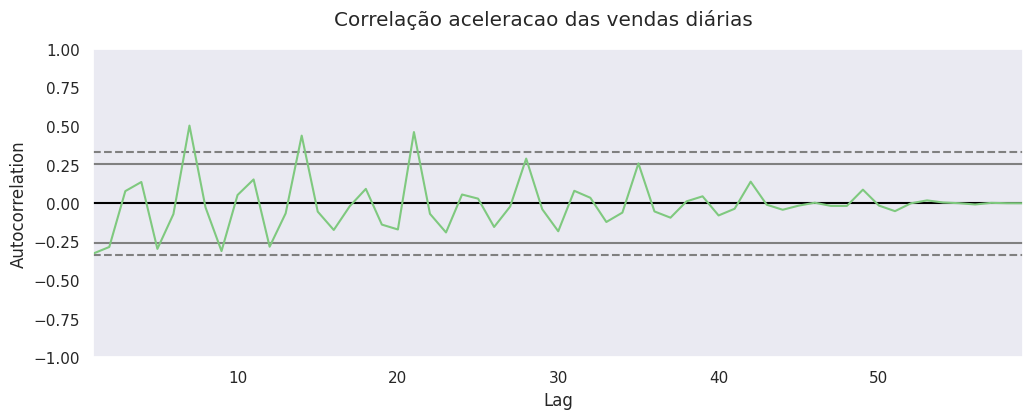

In [42]:
ax = plt.figure(figsize=(12,4))
ax.suptitle('Correlação aceleracao das vendas diárias')
autocorrelation_plot(chocolura_vendas_dia['aceleracao'][2:]);

# Cafelura

In [43]:
dados_cafelura = pd.read_csv('/content/cafelura.csv')

In [44]:
dados_cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [45]:
dados_cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [46]:
dados_cafelura['mes'] = pd.to_datetime(dados_cafelura['mes'])

In [47]:
dados_cafelura['aumento'] = dados_cafelura['vendas'].diff()
dados_cafelura['aceleracao'] = dados_cafelura['aumento'].diff()

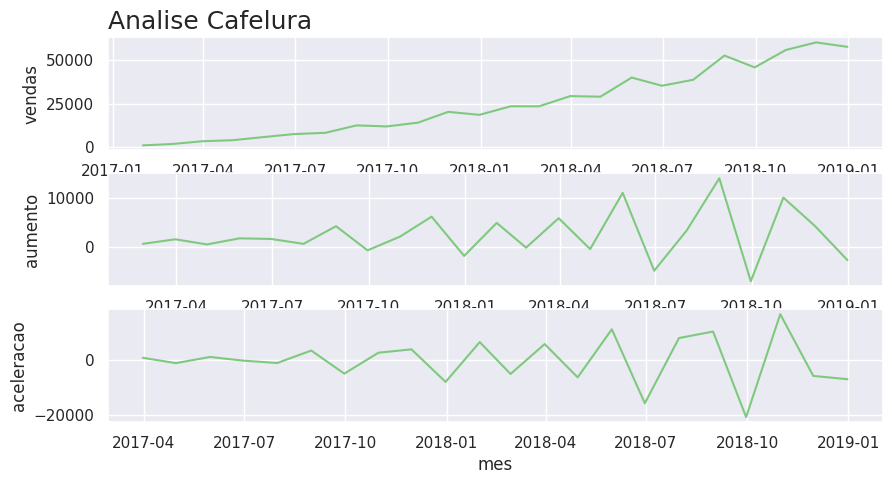

In [48]:
plot_grafico_comparacao(data_set=dados_cafelura, x='mes', y1='vendas', y2='aumento', y3='aceleracao', titulo='Analise Cafelura')

In [49]:
qnt_dias_fds = pd.read_csv('/content/dias_final_de_semana.csv')

In [50]:
qnt_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [51]:
qnt_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [52]:
dados_cafelura['vendas normalizadas'] = dados_cafelura['vendas'] / qnt_dias_fds['quantidade_de_dias'].values

In [53]:
dados_cafelura.head()

,mes,vendas,aumento,aceleracao,vendas normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


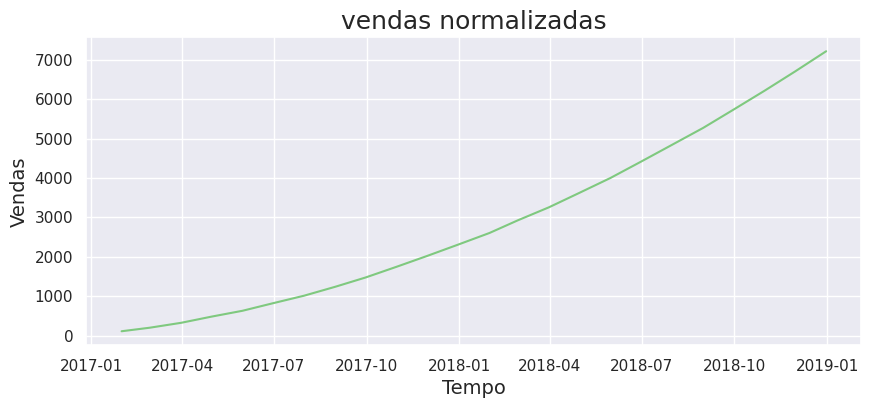

In [54]:
plot_grafico(data_set=dados_cafelura, x='mes', y='vendas normalizadas', label='vendas normalizadas', label_y='Vendas', label_x='Tempo', figure_size_x=10,figure_size_y=4)

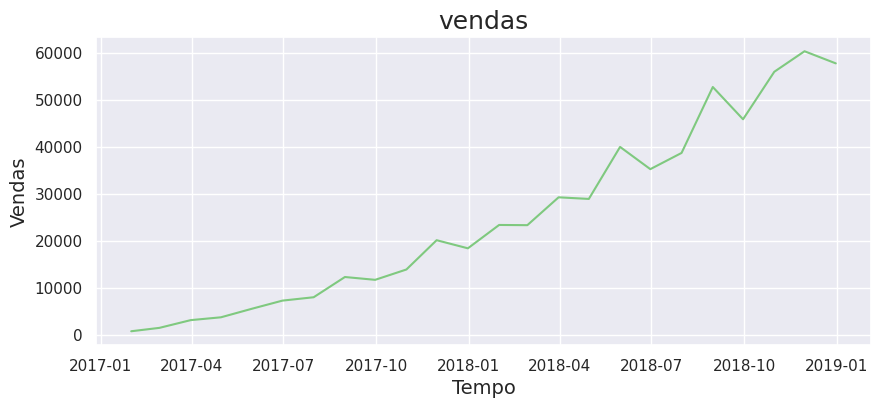

In [55]:
plot_grafico(data_set=dados_cafelura, x='mes', y='vendas', label='vendas', label_y='Vendas', label_x='Tempo', figure_size_x=10,figure_size_y=4)

**Statsmodels**

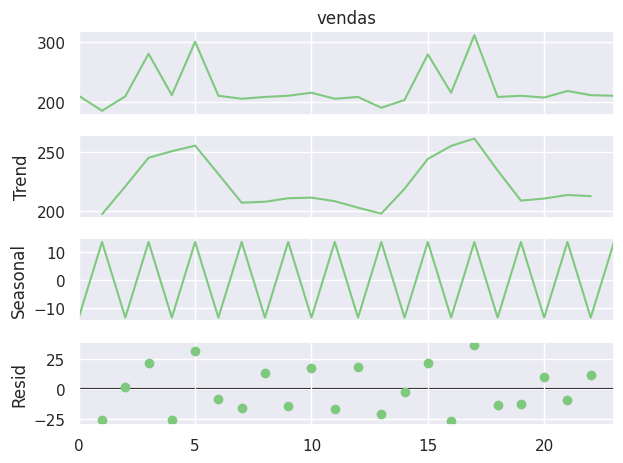

In [56]:
# (x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
resultado = seasonal_decompose(dados_chocolura['vendas'], period=2)
ax = resultado.plot()

In [57]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuos = resultado.resid

In [58]:
data = ({'Observacao': observacao,
       'Tendencia': tendencia,
       'Sazonalidade': sazonalidade,
       'Residuos': residuos})
resultado = pd.DataFrame(data)

In [59]:
resultado.head()

,Observacao,Tendencia,Sazonalidade,Residuos
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


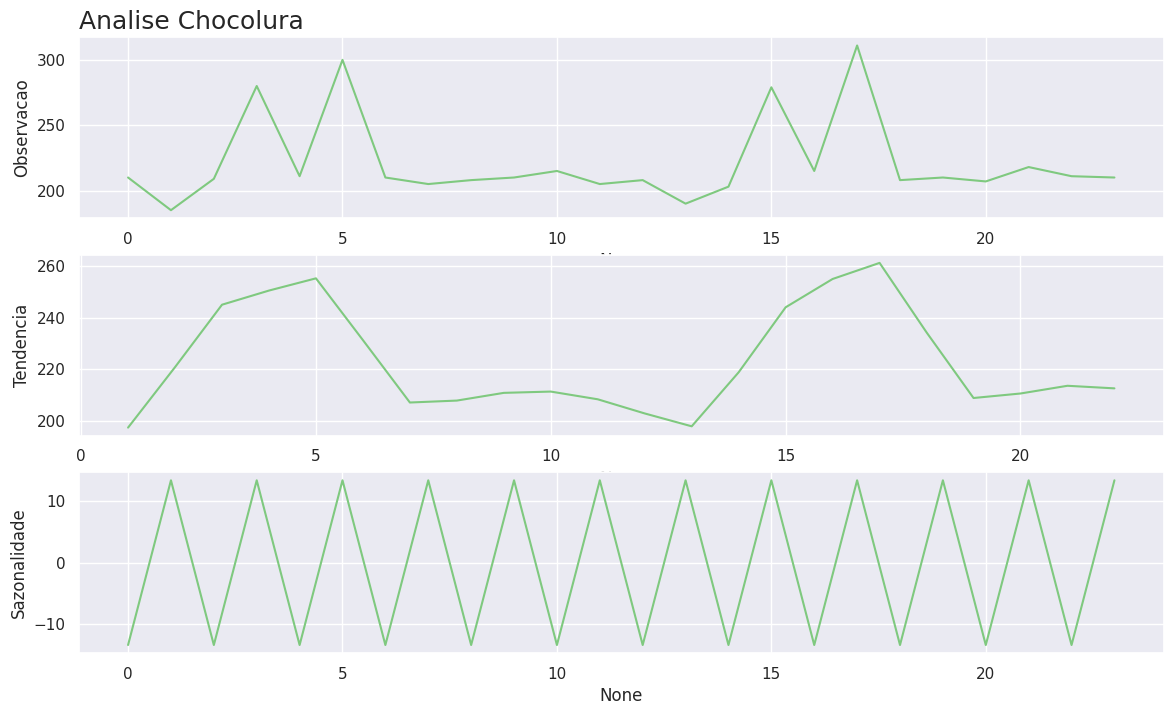

In [60]:
plot_grafico_comparacao(data_set=resultado, x=resultado.index, y1='Observacao', y2='Tendencia', y3='Sazonalidade', titulo='Analise Chocolura',figure_size_x=14 ,figure_size_y=8)

# Alucel

## Analise de vendas

In [61]:
dados_alucel = pd.read_csv('/content/alucel.csv')

In [68]:
dados_alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


In [66]:
dados_alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [64]:
dados_alucel['dia'] = pd.to_datetime(dados_alucel['dia'])

In [67]:
dados_alucel['aumento'] = dados_alucel['vendas'].diff()
dados_alucel['aceleracao'] = dados_alucel['aumento'].diff()

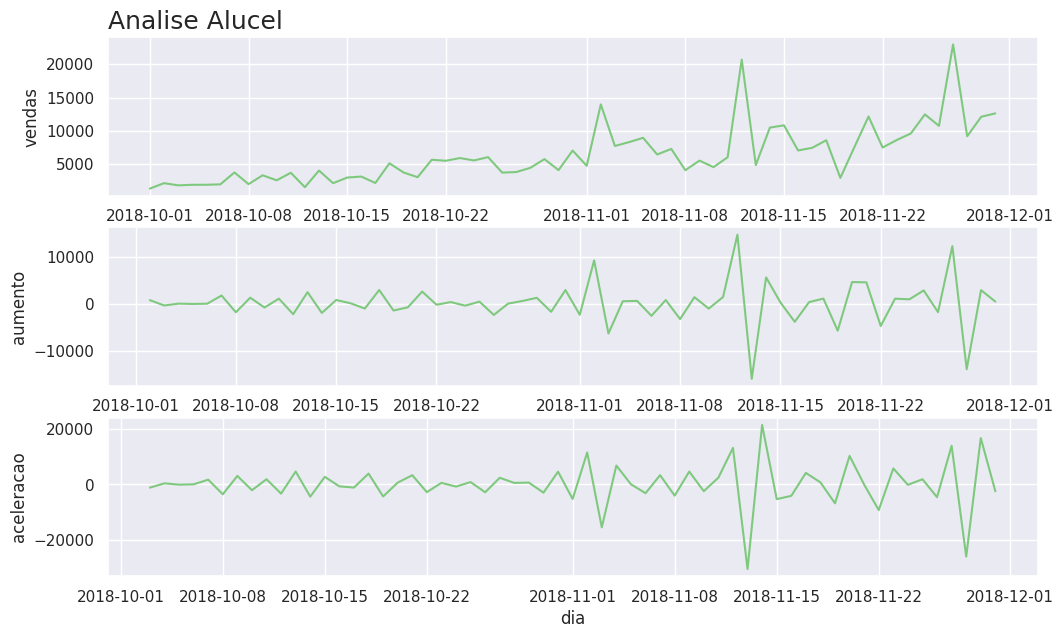

In [71]:
plot_grafico_comparacao(data_set=dados_alucel, x='dia', y1='vendas', y2='aumento', y3='aceleracao', titulo='Analise Alucel',figure_size_x=12,figure_size_y=7)

**Media Movel**

In [72]:
dados_alucel['media_movel'] = dados_alucel['vendas'].rolling(window=7).mean()

In [74]:
dados_alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


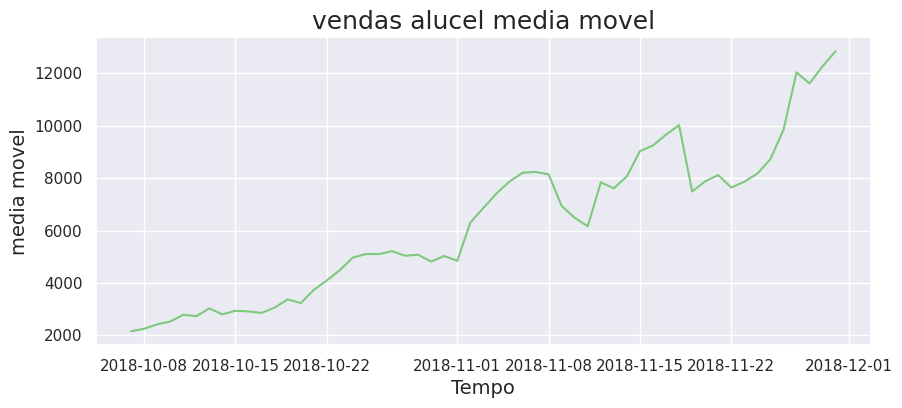

In [75]:
plot_grafico(data_set=dados_alucel, x='dia', y='media_movel', label='vendas alucel media movel', label_y='media movel', label_x='Tempo', figure_size_x=10,figure_size_y=4)

In [76]:
dados_alucel['media_movel_21'] = dados_alucel['vendas'].rolling(window=21).mean()

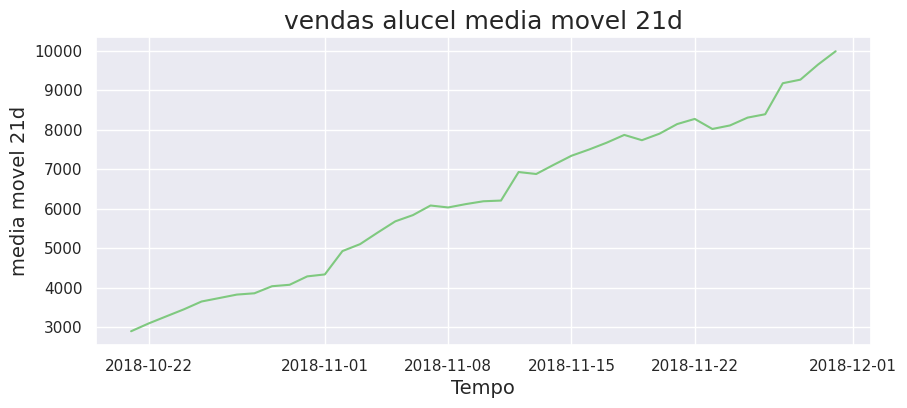

In [77]:
plot_grafico(data_set=dados_alucel, x='dia', y='media_movel_21', label='vendas alucel media movel 21d', label_y='media movel 21d', label_x='Tempo', figure_size_x=10,figure_size_y=4)

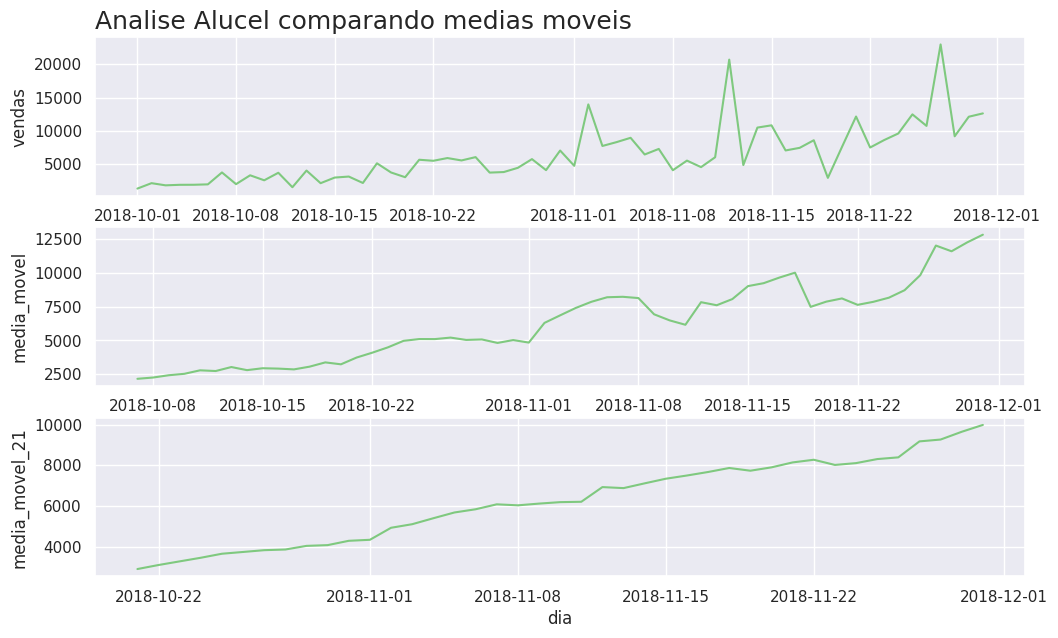

In [80]:
plot_grafico_comparacao(data_set=dados_alucel, x='dia', y1='vendas', y2='media_movel', y3='media_movel_21', titulo='Analise Alucel comparando medias moveis',figure_size_x=12,figure_size_y=7)